This notebook reproduces the process of collection of datasets into the folder `datasets`. 

During the process, it creates lots of temporary files that can safely be removed.

In [2]:
import pandas as pd
import numpy as np
import csv
import os

### APT

In [1]:
! gdown --id 1a4_w9ZXMoD8AHcnLi6BIHtUCSDhsRlJp && unzip "adversarial datasets.zip"

Archive:  adversarial datasets.zip
  inflating: ap-h-test               
  inflating: ap-h-train              
  inflating: apt5-m                  
  inflating: apt5-tw                 
  inflating: README.txt              


Downloading...
From: https://drive.google.com/uc?id=1a4_w9ZXMoD8AHcnLi6BIHtUCSDhsRlJp
To: C:\Users\david\YandexDisk\mainwork\skoltech\tost\mutual_implication_score\benchmarking\adversarial datasets.zip

  0%|          | 0.00/3.31M [00:00<?, ?B/s]
 32%|███▏      | 1.05M/3.31M [00:00<00:00, 8.37MB/s]
100%|██████████| 3.31M/3.31M [00:00<00:00, 19.0MB/s]


In [3]:
df = pd.read_csv('ap-h-test', sep='\t')
print(df.shape)
df = df.dropna()
print(df.shape)

(1261, 3)
(1252, 3)


In [4]:
pd.DataFrame({
    'text1': df.text_a,
    'text2': df.text_b,
    'human': df.labels,
}).to_csv('datasets/advers.csv', index=None)

### Yamshikov

In [5]:
df = pd.concat([
    pd.read_csv('https://raw.githubusercontent.com/VAShibaev/semantic_similarity_metrics/main/Paraphrase/Paraphrase.csv'),
    pd.read_csv('https://raw.githubusercontent.com/VAShibaev/semantic_similarity_metrics/main/Paraphrase/Paraphrase_random.csv'),
    pd.read_csv('https://raw.githubusercontent.com/VAShibaev/semantic_similarity_metrics/main/Paralex/Paralex.csv'),
    pd.read_csv('https://raw.githubusercontent.com/VAShibaev/semantic_similarity_metrics/main/Paralex/Paralex_random.csv'),
]).drop_duplicates(['text_1', 'text_2'])
print(df.shape)

(3223, 6)


In [6]:
pd.DataFrame({
    'text1': df.text_1,
    'text2': df.text_2,
    'human': df.avg_score,
}).to_csv('datasets/yamsh_para.csv', index=None)

In [7]:
df = pd.concat([
    pd.read_csv('https://raw.githubusercontent.com/VAShibaev/semantic_similarity_metrics/main/Bible/Bible.csv'),
    pd.read_csv('https://raw.githubusercontent.com/VAShibaev/semantic_similarity_metrics/main/Bible/Bible_random.csv'),
]).drop_duplicates(['text_1', 'text_2'])
print(df.shape)

pd.DataFrame({
    'text1': df.text_1,
    'text2': df.text_2,
    'human': df.avg_score,
}).to_csv('datasets/yamsh_bible.csv', index=None)

(2000, 6)


In [8]:
df = pd.concat([
    pd.read_csv('https://raw.githubusercontent.com/VAShibaev/semantic_similarity_metrics/main/GYAFC/GYAFC_formal.csv'),
    pd.read_csv('https://raw.githubusercontent.com/VAShibaev/semantic_similarity_metrics/main/GYAFC/GYAFC_formal_random.csv'),
    pd.read_csv('https://raw.githubusercontent.com/VAShibaev/semantic_similarity_metrics/main/GYAFC/GYAFC_informal.csv'),
    pd.read_csv('https://raw.githubusercontent.com/VAShibaev/semantic_similarity_metrics/main/GYAFC/GYAFC_informal_random.csv'),
    pd.read_csv('https://raw.githubusercontent.com/VAShibaev/semantic_similarity_metrics/main/GYAFC/GYAFC_rewrites.csv'),
    pd.read_csv('https://raw.githubusercontent.com/VAShibaev/semantic_similarity_metrics/main/GYAFC/GYAFC_rewrites_random.csv'),
])
print(df.shape)

pd.DataFrame({
    'text1': df.text_1,
    'text2': df.text_2,
    'human': df.avg_score,
}).to_csv('datasets/yamsh_gyafc.csv', index=None)

(6000, 6)


In [71]:
df = pd.concat([
    pd.read_csv('https://raw.githubusercontent.com/VAShibaev/semantic_similarity_metrics/main/Yelp/Yelp.csv'),
    pd.read_csv('https://raw.githubusercontent.com/VAShibaev/semantic_similarity_metrics/main/Yelp/Yelp_random.csv'),
])
print(df.shape)

pd.DataFrame({
    'text1': df.text_1,
    'text2': df.text_2,
    'human': df.avg_score,
}).to_csv('datasets/yamsh_yelp.csv', index=None)

(2000, 6)


### ETPC

надо доразобраться, как Коля собрал такой датасет

In [9]:
!wget https://raw.githubusercontent.com/venelink/ETPC/master/Corpus/text_pairs.xml
!wget https://raw.githubusercontent.com/venelink/ETPC/master/Corpus/textual_np_neg.xml
!wget https://raw.githubusercontent.com/venelink/ETPC/master/Corpus/textual_np_pos.xml

--2022-05-04 17:44:44--  https://raw.githubusercontent.com/venelink/ETPC/master/Corpus/text_pairs.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4743037 (4,5M) [text/plain]
Saving to: 'text_pairs.xml'

     0K .......... .......... .......... .......... ..........  1% 1,11M 4s
    50K .......... .......... .......... .......... ..........  2% 4,34M 2s
   100K .......... .......... .......... .......... ..........  3% 2,02M 2s
   150K .......... .......... .......... .......... ..........  4% 5,00M 2s
   200K .......... .......... .......... .......... ..........  5% 2,34M 2s
   250K .......... .......... .......... .......... ..........  6% 4,45M 2s
   300K .......... .......... .......... .......... ..........  7% 6,46M 2s
   350K .....

--2022-05-04 17:44:45--  https://raw.githubusercontent.com/venelink/ETPC/master/Corpus/textual_np_pos.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2315282 (2,2M) [text/plain]
Saving to: 'textual_np_pos.xml'

     0K .......... .......... .......... .......... ..........  2% 1,11M 2s
    50K .......... .......... .......... .......... ..........  4% 3,03M 1s
   100K .......... .......... .......... .......... ..........  6% 1,67M 1s
   150K .......... .......... .......... .......... ..........  8% 3,47M 1s
   200K .......... .......... .......... .......... .......... 11% 3,15M 1s
   250K .......... .......... .......... .......... .......... 13% 3,24M 1s
   300K .......... .......... .......... .......... .......... 15% 4,14M 1s
   35

In [50]:
df = pd.concat([
    pd.read_xml('https://raw.githubusercontent.com/venelink/ETPC/master/Corpus/textual_np_neg.xml'),
    pd.read_xml('https://raw.githubusercontent.com/venelink/ETPC/master/Corpus/textual_np_pos.xml')
])
df.shape

(8993, 12)

In [51]:
df.drop_duplicates(subset=['s1_text', 's2_text']).shape

(8361, 12)

In [49]:
pd.read_xml('https://raw.githubusercontent.com/venelink/ETPC/master/Corpus/textual_np_pos.xml').shape

(5599, 12)

In [48]:
pd.read_xml('https://raw.githubusercontent.com/venelink/ETPC/master/Corpus/textual_np_neg.xml').shape

(3394, 12)

In [47]:
df.shape

(8993, 12)

In [45]:
df = pd.read_xml('https://raw.githubusercontent.com/venelink/ETPC/master/Corpus/textual_np_pos.xml')

In [44]:
df

,pair_id,type_id,type_name,sense_preserving,s1_scope,s2_scope,s1_text,s2_text,key_s1,key_s2,k1_text,k2_text
0,2,7,Same Polarity Substitution (named ent.),no,"13, 14, 15","16, 17, 18",$ 2.5 billion,$ 1.8 billion,None,None,None,None
1,2,25,Addition/Deletion,no,None,"1, 2, 3, 4, 5, 6, 7, 8, 9",None,bought Dominick 's in 1995 for $ 693 million,None,None,None,None
2,4,7,Same Polarity Substitution (named ent.),no,"8, 9","3, 4",19 cents,20 cents,None,None,None,None
3,4,7,Same Polarity Substitution (named ent.),no,"12, 13","7, 8",4.4 %,4.6 %,None,None,None,None
4,4,6,Same Polarity Substitution (contextual),no,"20, 21, 22","10, 11",having earlier set,to set,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
3389,5795,25,Addition/Deletion,no,"20, 21, 22, 23, 24, 25, 26, 27",None,as storm clouds threatened to dump more rain,None,None,None,None,None
3390,5797,25,Addition/Deletion,no,"0, 1, 2, 3, 4, 5, 6",None,"After Hughes refused to rehire Hernandez ,",None,None,None,None,None
3391,5797,25,Addition/Deletion,no,None,"8, 9",None,and sued,None,None,None,None
3392,5798,30,Non-paraphrase,no,whole sentence,whole sentence,There are 103 Democrats in the Assembly and 47...,Democrats dominate the Assembly while Republic...,None,None,None,None


In [14]:
with open('text_pairs.xml', 'r') as f:
    etpc = f.read().replace("\x12", "'")
df = pd.read_xml(etpc)
print(df.shape)
pd.DataFrame({
    'text1': df.sent1_raw,
    'text2': df.sent2_raw,
    'human': df.etpc_label,
}).to_csv('datasets/etpc.csv', index=None)

(5801, 10)


### PAWS (wiki)

In [15]:
!wget https://storage.googleapis.com/paws/english/paws_wiki_labeled_final.tar.gz && tar -xvzf paws_wiki_labeled_final.tar.gz

--2022-05-04 17:45:41--  https://storage.googleapis.com/paws/english/paws_wiki_labeled_final.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 2a00:1450:4010:c0f::80, 2a00:1450:4010:c0d::80, 2a00:1450:4010:c1e::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2a00:1450:4010:c0f::80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4687157 (4,5M) [application/gzip]
Saving to: 'paws_wiki_labeled_final.tar.gz'

     0K .......... .......... .......... .......... ..........  1% 1,22M 4s
    50K .......... .......... .......... .......... ..........  2% 2,13M 3s
   100K .......... .......... .......... .......... ..........  3% 5,25M 2s
   150K .......... .......... .......... .......... ..........  4% 5,54M 2s
   200K .......... .......... .......... .......... ..........  5% 7,50M 2s
   250K .......... .......... .......... .......... ..........  6% 4,64M 1s
   300K .......... .......... .......... .......... ..........  7% 5,

In [18]:
df = pd.read_csv('final/test.tsv', sep='\t')
print(df.shape)

(8000, 4)


In [17]:
pd.DataFrame({
    'text1': df.sentence1,
    'text2': df.sentence2,
    'human': df.label,
}).to_csv('datasets/paws.csv', index=None)

### PAWS (QQP)

Please follow the instructions from https://github.com/google-research-datasets/paws to re-generate the dataset. 

### Twitter-URL
Please follow the instructions from https://github.com/lanwuwei/Twitter-URL-Corpus to download the dataset.

### PIT

In [19]:
!wget https://github.com/cocoxu/SemEval-PIT2015/blob/master/data/SemEval-PIT2015-github.zip?raw=true --content-disposition && unzip "SemEval-PIT2015-github.zip"

Archive:  SemEval-PIT2015-github.zip
   creating: SemEval-PIT2015-github/
  inflating: SemEval-PIT2015-github/.DS_Store  
   creating: __MACOSX/             
   creating: __MACOSX/SemEval-PIT2015-github/
  inflating: __MACOSX/SemEval-PIT2015-github/._.DS_Store  
   creating: SemEval-PIT2015-github/.git/
   creating: SemEval-PIT2015-github/.git/branches/
  inflating: SemEval-PIT2015-github/.git/config  
  inflating: SemEval-PIT2015-github/.git/description  
  inflating: SemEval-PIT2015-github/.git/FETCH_HEAD  
  inflating: SemEval-PIT2015-github/.git/HEAD  
   creating: SemEval-PIT2015-github/.git/hooks/
  inflating: SemEval-PIT2015-github/.git/hooks/applypatch-msg.sample  
  inflating: SemEval-PIT2015-github/.git/hooks/commit-msg.sample  
  inflating: SemEval-PIT2015-github/.git/hooks/post-update.sample  
  inflating: SemEval-PIT2015-github/.git/hooks/pre-applypatch.sample  
  inflating: SemEval-PIT2015-github/.git/hooks/pre-commit.sample  
  inflating: SemEval-PIT2015-github/.git/hook

--2022-05-04 17:45:59--  https://github.com/cocoxu/SemEval-PIT2015/blob/master/data/SemEval-PIT2015-github.zip?raw=true
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/cocoxu/SemEval-PIT2015/raw/master/data/SemEval-PIT2015-github.zip [following]
--2022-05-04 17:45:59--  https://github.com/cocoxu/SemEval-PIT2015/raw/master/data/SemEval-PIT2015-github.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/cocoxu/SemEval-PIT2015/master/data/SemEval-PIT2015-github.zip [following]
--2022-05-04 17:46:00--  https://raw.githubusercontent.com/cocoxu/SemEval-PIT2015/master/data/SemEval-PIT2015-github.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8003::154, ...
Connecting to raw.githu

In [21]:
pit = pd.read_csv('SemEval-PIT2015-github/data/test.data', sep='\t', header=None, quoting=csv.QUOTE_NONE)
pit.columns = ' Topic_Id | Topic_Name | Sent_1 | Sent_2 | Label | Sent_1_tag | Sent_2_tag'.strip().split(' | ')

In [22]:
pd.DataFrame({
    'text1': pit.Sent_1,
    'text2': pit.Sent_2,
    'human': pit.Label,
}).to_csv('datasets/pit.csv', index=None)

In [23]:
pit.shape

(972, 7)

### MSRPC

In [25]:
# This was the old and incorrect way we loaded the dataset
# df = pd.read_csv("https://raw.githubusercontent.com/brmson/dataset-sts/master/data/para/msr/msr-para-test.tsv", error_bad_lines=False,sep = '\t')
# df.dropna(subset = ['#1 String', '#2 String', 'Quality'], inplace = True)
df = pd.read_csv('https://raw.githubusercontent.com/brmson/dataset-sts/master/data/para/msr/msr-para-test.tsv', sep='\t', quoting=csv.QUOTE_NONE)
print(df.shape)

(1725, 5)


In [26]:
pd.DataFrame({
    'text1': df['#1 String'],
    'text2': df['#2 String'],
    'human': df.Quality,
}).to_csv('datasets/msr.csv', index=None)

### SICK

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/brmson/dataset-sts/master/data/sts/sick2014/SICK_test_annotated.txt', sep='\t')
print(df.shape)

(4927, 5)


In [28]:
pd.DataFrame({
    'text1': df.sentence_A,
    'text2': df.sentence_B,
    'human': df.relatedness_score,
}).to_csv('datasets/sick.csv', index=None)

### Tox600

In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/skoltech-nlp/detox/main/emnlp2021/data/manual_markup/emnlp_eval_mean.tsv', sep='\t')

In [30]:
pd.DataFrame({
    'text1': df.original,
    'text2': df.rewritten,
    'human': df.meaning,
}).to_csv('datasets/tox600.csv', index=None)

### STRAP


In [32]:
!git clone https://github.com/martiansideofthemoon/style-transfer-paraphrase

Cloning into 'style-transfer-paraphrase'...


In [33]:
STRAP_DATA_ROOT = 'style-transfer-paraphrase/mturk_evals/'
STRAP_LABELS = {
    'approximately the same meaning and the rewritten sentence is grammatical': 1,
    'approximately the same meaning, but the rewritten sentence is ungrammatical': 1,
    'no paraphrase relationship': 0,
}

In [34]:
coha = pd.read_csv(STRAP_DATA_ROOT + 'coha_1990s-2000s_original_vs_paraphrase_250/Batch_4025612_batch_results.csv')
coha_mean = coha.groupby(['Input.text1', 'Input.text2'])['Answer.semantic-similarity.label'].aggregate(
    lambda x: np.mean([STRAP_LABELS[y] for y in x])
).reset_index()
coha_mean.columns = ['text1', 'text2', 'human']
coha_mean.shape

(100, 3)

In [35]:
coha_mean.to_csv('datasets/STRAP_COHA.csv', index=None)

In [36]:
tables = []
for dirname, system_name in {
    'formality_gold_vs_generated_baseline_he_2020': 'he_2020',
    'formality_gold_vs_generated_baseline_unmt': 'unmt',
    'formality_gold_vs_generated_single_nucleus_paraphrase': 'paraphrase_base',
    'formality_gold_vs_generated_single_nucleus_paraphrase_0.0': 'paraphrase_0.0',
    'formality_gold_vs_generated_single_nucleus_paraphrase_0.9': 'paraphrase_0.9',
}.items():
    for fname in os.listdir(STRAP_DATA_ROOT+dirname):
        if fname.endswith('batch_results.csv'):
            df = pd.read_csv(STRAP_DATA_ROOT +dirname + '/' + fname)
            tables.append(pd.DataFrame({
                'text1': df['Input.text1'],
                'text2': df['Input.text2'],
                'filename': fname,
                'system': system_name,
                'score': df['Answer.semantic-similarity.label'].apply(lambda x: STRAP_LABELS[x])
            }))
formality_raw = pd.concat(tables)

In [37]:
formality_agg = formality_raw.groupby(['system', 'text1', 'text2']).score.aggregate([len, np.mean])
formality_agg.columns = ['n_scores', 'mean_score']
formality_agg.reset_index(inplace=True)
formality_agg.shape

(684, 5)

In [38]:
pd.DataFrame({
    'text1': formality_agg.text1,
    'text2': formality_agg.text2,
    'human': formality_agg.mean_score,
}).to_csv('datasets/STRAP_formality.csv', index=None)

In [39]:
tables = []
for dirname, system_name in {
    'shakespeare_gold_vs_generated_baseline_he_2020': 'he_2020',
    'shakespeare_gold_vs_generated_baseline_unmt': 'unmt',
    'shakespeare_gold_vs_generated_single_model_nucleus_paraphrase': 'paraphrase_base',
    'shakespeare_gold_vs_generated_single_nucleus_paraphrase_0.0': 'paraphrase_0.0',
}.items():
    for fname in os.listdir(STRAP_DATA_ROOT+dirname):
        if fname.endswith('batch_results.csv'):
            df = pd.read_csv(STRAP_DATA_ROOT +dirname + '/' + fname)
            tables.append(pd.DataFrame({
                'text1': df['Input.text1'],
                'text2': df['Input.text2'],
                'filename': fname,
                'system': system_name,
                'score': df['Answer.semantic-similarity.label'].apply(lambda x: STRAP_LABELS[x])
            }))
shakespeare_raw = pd.concat(tables)

In [40]:
shakespeare_agg = shakespeare_raw.groupby(['system', 'text1', 'text2']).score.aggregate([len, np.mean])
shakespeare_agg.columns = ['n_scores', 'mean_score']
shakespeare_agg.reset_index(inplace=True)
shakespeare_agg.index.name = 'idx'
shakespeare_agg.shape

(550, 5)

In [41]:
pd.DataFrame({
    'text1': shakespeare_agg.text1,
    'text2': shakespeare_agg.text2,
    'human': shakespeare_agg.mean_score,
}).to_csv('datasets/STRAP_shakespeare.csv', index=None)

### xformal-FoST 

Please follow the instructions from https://github.com/Elbria/xformal-FoST-meta/tree/master/meta-evaluation-files to obtain the dataset. 

## PG-YELP

The original dataset is a result of side-by-side comparison, and therefore the labels are pairwise. 

The details are provided in the paper [Unsupervised Evaluation Metrics and Learning Criteria for Non-Parallel Textual Transfer](https://aclanthology.org/D19-5614/) by Pang and Gimpel, 2019. 

We use the http://choix.lum.li/en/latest/ package to obtain individual scores from the comparisons.

In [51]:
import choix
import scipy.stats

In [42]:
p = 'source_data/textual-transfer-pairwise-comparison/'

dfs = pd.concat([
    pd.read_json(p + f, lines=True)
    for f in os.listdir(p)
    if f.endswith('jsonl')
])
print(dfs.shape)

(649, 9)


In [43]:
unpaired = []
for i, row in dfs.iterrows():
    if row.content_better == 1:
        scores = [1, 0]
    elif row.content_better == 2:
        scores = [0, 1]
    else:
        scores = [0.5, 0.5]
    for score, text, model in zip(scores, [row.sent1, row.sent2], [row.model1, row.model2]):
        unpaired.append({'pair_id': i, 'original': row.ori_sent, 'rewritten': text, 'score': score, 'model': model, 'style': row.ori_style})
unpaired = pd.DataFrame(unpaired).dropna()
print(len(unpaired))

1296


In [44]:
all_outputs = sorted({(row.original, row.rewritten) for i, row in unpaired.iterrows()})
print(len(all_outputs))

848


In [45]:
id_pairs = []
for i, row in dfs.iterrows():
    if row.ori_sent is None:
        continue
    idx1 = all_outputs.index((row.ori_sent, row.sent1))
    idx2 = all_outputs.index((row.ori_sent, row.sent2))
    if row.content_better == 1:
        id_pairs.append([idx1, idx2])
        id_pairs.append([idx1, idx2])
    elif row.content_better == 2:
        id_pairs.append([idx2, idx1])
        id_pairs.append([idx2, idx1])
    else:
        id_pairs.append([idx1, idx2])
        id_pairs.append([idx2, idx1])

In [48]:
rankings = choix.lsr_pairwise(len(all_outputs), id_pairs, alpha=0.1)

<AxesSubplot:>

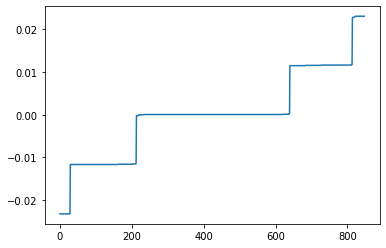

In [49]:
pd.Series(sorted(rankings)).plot()

In [52]:
r2 = scipy.stats.rankdata((rankings / (rankings.std() * 0.1)).round(0), method='dense')

In [54]:
pd.Series(r2).value_counts().sort_index()

1     29
2    184
3    427
4    174
5     34
dtype: int64

In [53]:
unpaired['ranking_score'] = [r2[all_outputs.index((row.original, row.rewritten))] for i, row in unpaired.iterrows()]

In [55]:
unpaired_dedup = unpaired.groupby(['original', 'rewritten', 'model', 'style', 'ranking_score']).first().reset_index()
unpaired_dedup.shape

(886, 7)

In [56]:
unpaired_dedup

,original,rewritten,model,style,ranking_score,pair_id,score
0,$ _num_ for a soda ?,$ _num_ for a !,m0,0,2,18,0.5
1,$ _num_ for a soda ?,$ _num_ for a beer !,m7,0,4,18,1.0
2,$ _num_ for a soda ?,$ _num_ for a plus ?,m2,0,3,18,0.5
3,( okay not confident in your product knowledge...,( good always quality in your work work too .,m7,0,3,67,0.5
4,( okay not confident in your product knowledge...,( its good ingredients in your product knowled...,m6,0,3,67,0.5
...,...,...,...,...,...,...,...
881,wow - i had robert 's special and it was delic...,however if i have eaten here from and it was j...,m0,1,2,170,0.0
882,wow - i had robert 's special and it was delic...,"wow , i had it not special and it was disgusti...",m7,1,4,170,1.0
883,you ca n't truly ever redeem yourself after th...,you ca n't absolutely ever recommended me like...,m2,0,3,42,0.5
884,you ca n't truly ever redeem yourself after th...,you ca n't really not take it at that .,m7,0,3,52,0.5


In [57]:
pd.DataFrame({
    'text1': unpaired_dedup.original,
    'text2': unpaired_dedup.rewritten,
    'human': unpaired_dedup.ranking_score,
}).to_csv('datasets/PG_YELP.csv', index=None)

### CAE-T5

In [60]:
df = pd.read_csv('source_data/f1659626_annon.csv')

In [67]:
d2 = df.groupby(
    ['original_toxic_comment', 'variable', 'value']
).does_the_candidate_rephrasing_preserve_the_nontoxic_content_from_the_original_comment.aggregate([
    len, np.mean, list
]).reset_index()
print(d2.shape)

(500, 6)


In [69]:
d2

,original_toxic_comment,variable,value,len,mean,list
0,""" Somebody was certainly stupid with his e-mail.""",CA rephrasing,he was <unk> in this country with a <unk>,5,1.8,"[5, 1, 1, 1, 1]"
1,""" Somebody was certainly stupid with his e-mail.""",CAET rephrasing,"""he was certainly not a friend of mine,"" he sa...",5,1.4,"[1, 1, 3, 1, 1]"
2,""" Somebody was certainly stupid with his e-mail.""",IE rephrasing,""" somebody was certainly [mask] with his e - m...",5,2.6,"[3, 1, 3, 3, 3]"
3,""" Somebody was certainly stupid with his e-mail.""",ST (cond) rephrasing,""" somebody was certainly with his "" somebody",5,1.0,"[1, 1, 1, 1, 1]"
4,""" Somebody was certainly stupid with his e-mail.""",ST (multi) rephrasing,""" somebody was certainly with his """,5,2.2,"[1, 1, 3, 5, 1]"
...,...,...,...,...,...,...
495,you haven't lost a single cent to anything lik...,CA rephrasing,you can get to get a place in the place in the...,5,2.2,"[1, 5, 2, 1, 2]"
496,you haven't lost a single cent to anything lik...,CAET rephrasing,you haven't seen a single one of them in years...,5,2.6,"[1, 5, 2, 1, 4]"
497,you haven't lost a single cent to anything lik...,IE rephrasing,you haven ' t lost a single cent to anything l...,5,3.6,"[1, 5, 4, 5, 3]"
498,you haven't lost a single cent to anything lik...,ST (cond) rephrasing,you haven't lost a single cent to anything lik...,5,1.6,"[1, 4, 1, 1, 1]"


In [70]:
pd.DataFrame({
    'text1': d2.original_toxic_comment,
    'text2': d2.value,
    'human': d2['mean'],
}).to_csv('datasets/CAE.csv', index=None)